In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from lppls import lppls_cmaes

In [2]:
# Download S&P 500 historical data (Gold futures as 'GC=F')
data = yf.download('NVDA', start='2022-01-01', progress=False)

In [3]:
# Convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [4]:
# Log transformation of the adjusted close price
price = np.log(data['Adj Close'].values)

In [5]:
# Create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [6]:
results = []
for t1_index in np.arange(0, 650, 30):
    observations_window = observations[:, t1_index:]

    lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)

    try:
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        predicted_prices = lppls_model.lppls(observations_window[0], tc, m, w, a, b, c1, c2)
        
        # Compute RSS (Residual Sum of Squares)
        residuals = observations_window[1] - predicted_prices
        rss = np.sum(np.abs(residuals))  # Sum of squared residuals
        
        results.append((rss, tc, t1_index))
    except:
        pass

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=695329, Wed Oct 23 13:15:24 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=777473, Wed Oct 23 13:15:27 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=791505, Wed Oct 23 13:15:29 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=784741, Wed Oct 23 13:15:29 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=736236, Wed Oct 23 13:15:29 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=732720, Wed Oct 23 13:15:29 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=705600, Wed Oct 23 13:15:29 2024)
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=765851, Wed Oct 23 13:15:29 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.403167611080195e+00 1.0e+00 1.23e+00  1e-01  5e+04 0:00.1
    2    320 1.252666958895223e+00 2.7e+00 1.37e+00  1e-01  4e+04 0:00.1
    3    480 1.332740173065343e+00 3.9

C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.2e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 13:16:27 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=489)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  500  80000 6.316887895025211e-02 1.8e+00 1.71e-01  1e-01  2e-01 0:22.6
  505  80800 6.316887954750351e-02 4.2e+00 1.95e-01  1e-01  3e-01 0:22.8


In [7]:
opt_params = sorted(results, key=lambda x: x[0])[1]
tc_opt = opt_params[1]

In [8]:
sorted(results, key=lambda x: x[0])

[(3.7327853903059145, 741189.4959678118, 630),
 (8.61577703396813, 739369.4101114928, 540),
 (36.58017064351201, 739204.376525923, 270),
 (37.83652066883807, 739508.4655766774, 210)]

In [9]:
opt_params

(8.61577703396813, 739369.4101114928, 540)

In [10]:
print(pd.Timestamp.fromordinal(int(tc_opt)))

2025-04-28 00:00:00


In [11]:
observations_window = observations[:, opt_params[2]:]

In [12]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=776933, Wed Oct 23 13:16:27 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.636258656102260e-01 1.0e+00 9.25e-01  8e-02  1e+04 0:00.0
    2    320 1.677541282057831e-01 5.9e+00 9.37e-01  8e-02  4e+03 0:00.1
    3    480 1.648674784877996e-01 1.9e+01 1.02e+00  8e-02  4e+03 0:00.1
   37   5920 1.659128472329001e-01 4.9e+01 2.22e+00  4e-08  1e-03 0:01.8
2025-02-25 00:00:00


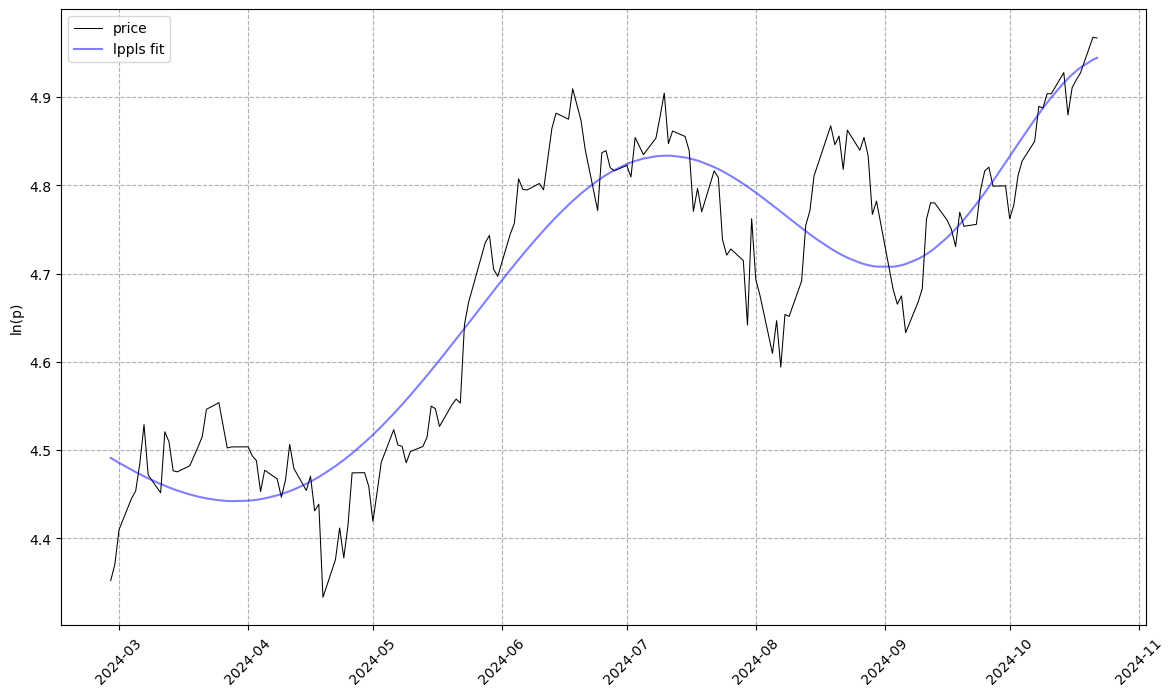

In [13]:
# visualize the fit
lppls_model.plot_fit()

In [14]:
len(observations_window[0])

165